In [13]:
import pandas as pd
import numpy as np
import glob
import os

In [14]:
import matplotlib.pyplot as plt

In [15]:
%matplotlib inline

In [ ]:
#!mkdir -p ./res_second_batch_using_first_batch_peak

In [53]:
os.chdir('/home/jlyu/xc3/experiment/ENL2/Chip-seq_analysis/no_spike_in/re_do_mapping_with_lambda/Run_On_Lvjie/res_second_batch_using_first_batch_peak')

/home/jlyu/xc3/experiment/ENL2/Chip-seq_analysis/no_spike_in/re_do_mapping_with_lambda/Run_On_Lvjie/res_second_batch_using_first_batch_peak/res_second_batch_using_first_batch_peak


In [54]:
!ls 

293.all.1_2.bed
293.all.1_2.counts.txt
293.all.1_2.new.heat.bed
293.all.1_2.str.bed
293.all.1_5.bed
293.all.1_5.counts.txt
293.all.1_5.new.heat.bed
293.all.1_5.str.bed
PeakMatrix_293_F_ENL_B_co-UP_genes.1_5.gz
PeakMatrix_293_F_ENL_B_co-UP_genes.gz
PeakMatrix_293_F_ENL_C_co-UP_genes.1_5.gz
PeakMatrix_293_F_ENL_C_co-UP_genes.gz
PeakMatrix_293_F_ENL_co-UP_genes.gz
PeakMatrix_293_F_T1_C_co-UP_genes.1_5.gz
PeakMatrix_293_F_T1_C_co-UP_genes.gz
PeakMatrix_293_F_T1_Y78A_co-UP_genes.1_5.gz
PeakMatrix_293_F_T1_Y78A_co-UP_genes.gz
PeakMatrix_293_F_T2_B_co-UP_genes.1_5.gz
PeakMatrix_293_F_T2_B_co-UP_genes.gz
PeakMatrix_293_F_T2_Y78A_co-UP_genes.1_5.gz
PeakMatrix_293_F_T2_Y78A_co-UP_genes.gz
PeakMatrix_293_F_T3_B_co-UP_genes.1_5.gz
PeakMatrix_293_F_T3_B_co-UP_genes.gz
PeakMatrix_293_F_T3_Y78A_co-UP_genes.1_5.gz
PeakMatrix_293_F_T3_Y78A_co-UP_genes.gz
PeakMatrix_293_F_Y78A_B_co-UP_genes.1_5.gz
PeakMatrix_293_F_Y78A_B_co-UP_genes.gz
T1.pdf
T1_1.5.pdf
T1_more.pdf
T1_more_1.5.pdf
T2.pdf
T2_1.5.pdf
T2_m

    > Heatmap 1: WT-C, T1-C, Y78A-B, T1_Y78A, subtract (WT-C, T1-C), subtract (WT-C, Y78A-B), subtract (WT-C, T1_Y78A), and subtract (T1_Y78A, T1-C)
    > Heatmap 2: WT-B, T2-B, Y78A-B, T2_Y78A, subtract (WT-B, T2-B), subtract (WT-B, Y78A-B), subtract (WT-B, T2_Y78A), and subtract (T2_Y78A, T2-B)
    > Heatmap 3: WT-B, T3-B, Y78A-B, T3_Y78A, subtract (WT-B, T3-B), subtract (WT-B, Y78A-B), subtract (WT-B, T3_Y78A), and subtract (T3_Y78A, T3-B)


### co up peaks

In [22]:
# previous 293 all co up peaks
coup_path = '/home/jlyu/xc3/experiment/ENL2/Chip-seq_analysis/no_spike_in/re_do_mapping_with_lambda/res_heatmap_coup_peaks/'
ths = [1.2, 1.5]
names = ['1_2','1_5']
# names = ['1_2']
for name in names:
    Bed = f'{coup_path}293.all.{name}.sig.anno.txt'
    outBed = f'293.all.{name}.new.heat.bed'
    line = "awk 'BEGIN{OFS=\"\\t\"}{if (NR>1){print $1,$2,$3,NR-2,\".\",\"+\"}}'" + f' {Bed} > {outBed}'
    print(line)
    os.system(line)

awk 'BEGIN{OFS="\t"}{if (NR>1){print $1,$2,$3,NR-2,".","+"}}' /home/jlyu/xc3/experiment/ENL2/Chip-seq_analysis/no_spike_in/re_do_mapping_with_lambda/res_heatmap_coup_peaks/293.all.1_2.sig.anno.txt > 293.all.1_2.new.heat.bed
awk 'BEGIN{OFS="\t"}{if (NR>1){print $1,$2,$3,NR-2,".","+"}}' /home/jlyu/xc3/experiment/ENL2/Chip-seq_analysis/no_spike_in/re_do_mapping_with_lambda/res_heatmap_coup_peaks/293.all.1_5.sig.anno.txt > 293.all.1_5.new.heat.bed


In [33]:
# !head $Bed
!head 293.all.1_2.new.heat.bed
name
!wc -l 293.all.1_2.new.heat.bed 

chr15	96872571	96885658	0	.	+
chr7	5457629	5470124	1	.	+
chr6	1608510	1616027	2	.	+
chr17	79368489	79375603	3	.	+
chr12	12869276	12879696	4	.	+
chr11	65186288	65204652	5	.	+
chr7	27197889	27240775	6	.	+
chr11	65264641	65277345	7	.	+
chr18	19747704	19753749	8	.	+
chr6	32934633	32953286	9	.	+
257 293.all.1_2.new.heat.bed


### Use co up peaks to extract signal from the second batch

In [25]:
# first batch bw files
bwpath = '/mount/weili2/lilab/xc3/ENL2/ChIP/bw_nsp/'
# second batch bw files
bwpath = '/mount/weili2/lilab/xc3/ENL2/ChIP/second_batch/nsp/bw/'
!ls $bwpath

293_ENL_B_treat.nsp.bw	  293_T2_C_treat.nsp.bw     293_Y78A_B_treat.nsp.bw
293_ENL_C_treat.nsp.bw	  293_T2_Y78A_treat.nsp.bw  293_Y78A_C_treat.nsp.bw
293_T1_B_treat.nsp.bw	  293_T3_B_treat.nsp.bw     293_input.nsp.bw
293_T1_C_treat.nsp.bw	  293_T3_C_treat.nsp.bw     293_vec_B_C_treat.nsp.bw
293_T1_Y78A_treat.nsp.bw  293_T3_Y78A_treat.nsp.bw
293_T2_B_treat.nsp.bw	  293_T4_treat.nsp.bw


In [14]:
exp = '293'
samples = ["ENL_C", "T1_C", "Y78A_B", "T1_Y78A",
           "ENL_B", "T2_B", "T2_Y78A", "T3_B", 
           "T3_Y78A"]
for sample in samples:
    bwfile = glob.glob(bwpath + exp + '*' + sample + '*.bw')[0]
#     peakBed = "293.all.1_2.new.heat.bed"
    peakBed = "293.all.1_5.new.heat.bed"
    print(bwfile)
    line = f'computeMatrix reference-point --referencePoint center -S {bwfile} -R {peakBed} --beforeRegionStartLength 5000 --afterRegionStartLength 5000 --binSize 100 --skipZeros --missingDataAsZero -o PeakMatrix_293_F_{sample}_co-UP_genes.1_5.gz -p 8'
    print(line + '\n****\n')
    os.system(line)

/mount/weili2/lilab/xc3/ENL2/ChIP/second_batch/nsp/bw/293_ENL_C_treat.nsp.bw
computeMatrix reference-point --referencePoint center -S /mount/weili2/lilab/xc3/ENL2/ChIP/second_batch/nsp/bw/293_ENL_C_treat.nsp.bw -R 293.all.1_5.new.heat.bed --beforeRegionStartLength 5000 --afterRegionStartLength 5000 --binSize 100 --skipZeros --missingDataAsZero -o PeakMatrix_293_F_ENL_C_co-UP_genes.1_5.gz -p 8
****

/mount/weili2/lilab/xc3/ENL2/ChIP/second_batch/nsp/bw/293_T1_C_treat.nsp.bw
computeMatrix reference-point --referencePoint center -S /mount/weili2/lilab/xc3/ENL2/ChIP/second_batch/nsp/bw/293_T1_C_treat.nsp.bw -R 293.all.1_5.new.heat.bed --beforeRegionStartLength 5000 --afterRegionStartLength 5000 --binSize 100 --skipZeros --missingDataAsZero -o PeakMatrix_293_F_T1_C_co-UP_genes.1_5.gz -p 8
****

/mount/weili2/lilab/xc3/ENL2/ChIP/second_batch/nsp/bw/293_Y78A_B_treat.nsp.bw
computeMatrix reference-point --referencePoint center -S /mount/weili2/lilab/xc3/ENL2/ChIP/second_batch/nsp/bw/293_Y78A_B

## use the bcm http server to download the data

In [7]:
def generate_outer_links(files):
    public_url_pre = "http://dldcc-web.brc.bcm.edu/lilab/xc3/ENL2/ChIP/tmp/"
    public_url_folder = "/mount/weili2/lilab/xc3/ENL2/ChIP/tmp/"
    for ifile in files:
        line = f"cp {ifile} {public_url_folder}{ifile}"
        print(line)
        os.system(line)
        print(f'{public_url_pre}{ifile}')

In [58]:
public_url_pre = "http://dldcc-web.brc.bcm.edu/lilab/xc3/ENL2/ChIP/tmp/"
public_url_folder = "/mount/weili2/lilab/xc3/ENL2/ChIP/tmp/"
work_path = "/home/jlyu/xc3/experiment/ENL2/Chip-seq_analysis/no_spike_in/re_do_mapping_with_lambda/Run_On_Lvjie/res_second_batch_using_first_batch_peak/"
files = glob.glob('*1_5.gz')
work_path

'/home/jlyu/xc3/experiment/ENL2/Chip-seq_analysis/no_spike_in/re_do_mapping_with_lambda/Run_On_Lvjie/res_second_batch_using_first_batch_peak/'

In [21]:
for ifile in files:
    source = work_path + ifile
    symbol = public_url_folder + ifile
    line = f"cp {source} {public_url_folder}{ifile}"
    print(line)
    os.system(line)
    print(f'{public_url_pre}{ifile}')
    
print(len(files))    

cp /home/jlyu/xc3/experiment/ENL2/Chip-seq_analysis/no_spike_in/re_do_mapping_with_lambda/Run_On_Lvjie/res_second_batch_using_first_batch_peak/PeakMatrix_293_F_ENL_C_co-UP_genes.1_5.gz /mount/weili2/lilab/xc3/ENL2/ChIP/tmp/PeakMatrix_293_F_ENL_C_co-UP_genes.1_5.gz
http://dldcc-web.brc.bcm.edu/lilab/xc3/ENL2/ChIP/tmp/PeakMatrix_293_F_ENL_C_co-UP_genes.1_5.gz
cp /home/jlyu/xc3/experiment/ENL2/Chip-seq_analysis/no_spike_in/re_do_mapping_with_lambda/Run_On_Lvjie/res_second_batch_using_first_batch_peak/PeakMatrix_293_F_T1_C_co-UP_genes.1_5.gz /mount/weili2/lilab/xc3/ENL2/ChIP/tmp/PeakMatrix_293_F_T1_C_co-UP_genes.1_5.gz
http://dldcc-web.brc.bcm.edu/lilab/xc3/ENL2/ChIP/tmp/PeakMatrix_293_F_T1_C_co-UP_genes.1_5.gz
cp /home/jlyu/xc3/experiment/ENL2/Chip-seq_analysis/no_spike_in/re_do_mapping_with_lambda/Run_On_Lvjie/res_second_batch_using_first_batch_peak/PeakMatrix_293_F_Y78A_B_co-UP_genes.1_5.gz /mount/weili2/lilab/xc3/ENL2/ChIP/tmp/PeakMatrix_293_F_Y78A_B_co-UP_genes.1_5.gz
http://dldcc-web

In [122]:
with open('ucsc_bws.txt', 'w') as f:
    for ifile in files:
        source = work_path + ifile
        symbol = public_url_folder + ifile
        line = f"ln -s {source} {public_url_folder}{ifile}"
        print(line)
        os.system(line)
        out_url = f'{public_url_pre}{ifile}'
        print(out_url)
        out_name = ifile.split('.bw')[0]
        out_line = f'track type=bigWig name={out_name} db=hg19 windowingFunction=maximum viewLimits=0:500 autoScale=off visibility=full bigDataUrl={out_url} '
        f.write(out_line + '\n')
        

TypeError: 'sep' is an invalid keyword argument for this function

## generate the co up heatmap 

    > Heatmap 1: WT-C, T1-C, Y78A-B, T1_Y78A, subtract (WT-C, T1-C), subtract (WT-C, Y78A-B), subtract (WT-C, T1_Y78A), and subtract (T1_Y78A, T1-C)
    > Heatmap 2: WT-B, T2-B, Y78A-B, T2_Y78A, subtract (WT-B, T2-B), subtract (WT-B, Y78A-B), subtract (WT-B, T2_Y78A), and subtract (T2_Y78A, T2-B)
    > Heatmap 3: WT-B, T3-B, Y78A-B, T3_Y78A, subtract (WT-B, T3-B), subtract (WT-B, Y78A-B), subtract (WT-B, T3_Y78A), and subtract (T3_Y78A, T3-B)

## Download the data into local disk

In [10]:
files = glob.glob('293.all*.counts.txt')
generate_outer_links(files)

cp 293.all.1_2.counts.txt /mount/weili2/lilab/xc3/ENL2/ChIP/tmp/293.all.1_2.counts.txt
http://dldcc-web.brc.bcm.edu/lilab/xc3/ENL2/ChIP/tmp/293.all.1_2.counts.txt
cp 293.all.1_5.counts.txt /mount/weili2/lilab/xc3/ENL2/ChIP/tmp/293.all.1_5.counts.txt
http://dldcc-web.brc.bcm.edu/lilab/xc3/ENL2/ChIP/tmp/293.all.1_5.counts.txt


## 2. extract the signal using the first batch peak regions and do the box plot 

In [41]:
bedfile = peakBed
df = pd.read_csv(bedfile,sep='\t',header=None)
df.columns = np.arange(0,df.shape[1])
# detect the strand and swap the start end when negative strand
# the last column should be strand
if df.iloc[0,-1] == '-' or df.iloc[0,-1] == '+':
    idx = df.iloc[:,-1] == '-'
    # swap the tss tes according to the strand
    df.loc[idx,[1,2]] = df.loc[idx,[2,1]].values
    # modify the strand
    df.iloc[:,-1] = '+'


In [45]:
df.shape[0]

54

In [46]:
# function for formating the chr start end into bed format
# if the last column has sign ('+' or '-'), then prepare to swap tss and tes for '-'
def convert_region_to_bed(bedfile, outname, header=None):
    df = pd.read_csv(bedfile,sep='\t',header=None)
    df.columns = np.arange(0,df.shape[1])
    # detect the strand and swap the start end when negative strand
    # the last column should be strand
    if df.iloc[0,-1] == '-' or df.iloc[0,-1] == '+':
        idx = df.iloc[:,-1] == '-'
        # swap the tss tes according to the strand
        df.loc[idx,[1,2]] = df.loc[idx,[2,1]].values
        # modify the strand
        df.iloc[:,-1] = '+'
        
    df.loc[:,3] = np.arange(df.shape[0])# for gene name column
    df.loc[:,4] = 0 # for bed format (value)
    df.loc[:,5] = '+'
    df = df.reindex(range(6), axis='columns')
    print('writing the output --> {}'.format(outname))
    print(f'{outname} --->: reformated bed_file as the input of the bigWigAverageoverBed')
    df.to_csv(outname,sep='\t',index=False,header=None)
    
    
def comp_avg_sig_from_bw_by_bed(bedfile, bw_files, which_column=2):
    """
    bedfile: the input merged bedfile which needs to extract the signal from
    bw_files: list of bw files whose signal is extracted from
    which_column: 3 is the acutal counts column, 4 is the acutal avg signal column;
    but, we need to use the first column as index, then 2 is the counts column;
    outname: reformat the bedfile to the normal 6 columns bed file
    will save the output file in the same folder as the bedfile
    """
    outname = bedfile.split('.bed')[0] + '.str.bed'
    # convert the 3 columns bed to the normal bed file
    convert_region_to_bed(bedfile, outname)
    for i,bw_file in enumerate(bw_files):
        command = line = f'~/xc3/software/bigWigAverageOverBed {bw_file} {outname} avg_sig_{i}.txt'
        print('execute --> {}'.format(command))
        os.system(command)
    dfs = []
    for i in range(len(bw_files)):
        dfs.append(pd.read_csv(f'avg_sig_{i}.txt',sep='\t',header=None, index_col=0))
    df = pd.DataFrame([dfs[0].iloc[:,0]] + # iloc[:,0]: the width
                      [dfi.iloc[:,which_column] for dfi in dfs]).T # conbine the columns together
    df.columns = ['width'] + [bw_file.split('/')[-1].split('.')[0] for bw_file in bw_files]
    df_bed = pd.read_csv(bedfile, sep='\t', header=None, names = ['chr', 'start', 'end'])
    df_out = df_bed.join(df)
    print(f"output file -->: {bedfile.split('.bed')[0] + '.counts.txt'}")
    df_out.to_csv(bedfile.split('.bed')[0] + '.counts.txt', sep='\t', index=False)

In [27]:
# generate the T1 T1_Y78A Y78A; T2 T2_Y78A Y78A; T3 T3_Y78A Y78A
exp = '293'
samples = ["ENL_C","ENL_B","T1_C", "Y78A_B", "T1_Y78A",
           "T2_B", "T2_Y78A", "T3_B", "T3_Y78A"]
bwfiles = []
for sample in samples:
    bwfile = glob.glob(bwpath + exp + '*' + sample + '*.bw')[0]
    bwfiles.append(bwfile)

In [28]:
bwfiles

['/mount/weili2/lilab/xc3/ENL2/ChIP/second_batch/nsp/bw/293_ENL_C_treat.nsp.bw',
 '/mount/weili2/lilab/xc3/ENL2/ChIP/second_batch/nsp/bw/293_ENL_B_treat.nsp.bw',
 '/mount/weili2/lilab/xc3/ENL2/ChIP/second_batch/nsp/bw/293_T1_C_treat.nsp.bw',
 '/mount/weili2/lilab/xc3/ENL2/ChIP/second_batch/nsp/bw/293_Y78A_B_treat.nsp.bw',
 '/mount/weili2/lilab/xc3/ENL2/ChIP/second_batch/nsp/bw/293_T1_Y78A_treat.nsp.bw',
 '/mount/weili2/lilab/xc3/ENL2/ChIP/second_batch/nsp/bw/293_T2_B_treat.nsp.bw',
 '/mount/weili2/lilab/xc3/ENL2/ChIP/second_batch/nsp/bw/293_T2_Y78A_treat.nsp.bw',
 '/mount/weili2/lilab/xc3/ENL2/ChIP/second_batch/nsp/bw/293_T3_B_treat.nsp.bw',
 '/mount/weili2/lilab/xc3/ENL2/ChIP/second_batch/nsp/bw/293_T3_Y78A_treat.nsp.bw']

In [55]:
peakBed = "293.all.1_5.bed"
comp_avg_sig_from_bw_by_bed(peakBed, bwfiles, 3)

writing the output --> 293.all.1_5.str.bed
293.all.1_5.str.bed --->: reformated bed_file as the input of the bigWigAverageoverBed
execute --> ~/xc3/software/bigWigAverageOverBed /mount/weili2/lilab/xc3/ENL2/ChIP/second_batch/nsp/bw/293_ENL_C_treat.nsp.bw 293.all.1_5.str.bed avg_sig_0.txt
execute --> ~/xc3/software/bigWigAverageOverBed /mount/weili2/lilab/xc3/ENL2/ChIP/second_batch/nsp/bw/293_ENL_B_treat.nsp.bw 293.all.1_5.str.bed avg_sig_1.txt
execute --> ~/xc3/software/bigWigAverageOverBed /mount/weili2/lilab/xc3/ENL2/ChIP/second_batch/nsp/bw/293_T1_C_treat.nsp.bw 293.all.1_5.str.bed avg_sig_2.txt
execute --> ~/xc3/software/bigWigAverageOverBed /mount/weili2/lilab/xc3/ENL2/ChIP/second_batch/nsp/bw/293_Y78A_B_treat.nsp.bw 293.all.1_5.str.bed avg_sig_3.txt
execute --> ~/xc3/software/bigWigAverageOverBed /mount/weili2/lilab/xc3/ENL2/ChIP/second_batch/nsp/bw/293_T1_Y78A_treat.nsp.bw 293.all.1_5.str.bed avg_sig_4.txt
execute --> ~/xc3/software/bigWigAverageOverBed /mount/weili2/lilab/xc3/E

In [59]:
!head 293.all.1_5.counts.txt 

# download the counts file
files = glob.glob('293.all.1_5.counts.txt')
for ifile in files:
    source = work_path + ifile
    symbol = public_url_folder + ifile
    line = f"cp {source} {public_url_folder}{ifile}"
    print(line)
    os.system(line)
    print(f'{public_url_pre}{ifile}')
    
print(len(files))

chr	start	end	width	293_ENL_C_treat	293_ENL_B_treat	293_T1_C_treat	293_Y78A_B_treat	293_T1_Y78A_treat	293_T2_B_treat	293_T2_Y78A_treat	293_T3_B_treat	293_T3_Y78A_treat
chr12	22093615	22095545	1930.0	5.65285	5.0025900000000005	4.911919999999999	2.77461	5.1943	4.68912	2.79793	7.84456	4.588080000000001
chr12	40498570	40500215	1645.0	6.49544	7.142860000000001	4.00304	2.90274	6.31003	7.07903	4.24012	7.59271	3.91185
chr12	54332285	54334216	1931.0	8.1217	6.06888	8.19161	3.14759	8.0782	11.1336	5.90523	14.5417	5.495080000000001
chr12	54392846	54395852	3006.0	5.02661	6.10778	6.9175	3.15502	5.68663	9.22821	3.13573	11.3812	3.81104
chr11	94473238	94474588	1350.0	5.03556	3.4637	4.65926	2.24296	2.43407	7.12	2.50074	6.61333	3.81185
chr17	46618157	46623367	5210.0	16.758	15.3054	16.7653	5.684069999999999	18.1019	23.7639	9.55048	30.2889	10.9628
chr17	46670267	46683328	13061.0	6.94235	5.34806	10.802	3.6121300000000005	5.35977	6.642060000000001	3.2921699999999996	9.78172	4.16477
chr17	46686377	46692492	611

## calculate the fold change

In [104]:
df = pd.read_csv('293.all.1_2.counts.txt', sep='\t',header=0)
df.head(3)

,chr,start,end,width,293_ENL_C_treat,293_ENL_B_treat,293_T1_C_treat,293_Y78A_B_treat,293_T1_Y78A_treat,293_T2_B_treat,293_T2_Y78A_treat,293_T3_B_treat,293_T3_Y78A_treat
0,chrX,139013059,139015539,2480.0,9.80887,5.94113,6.68750,3.49597,6.54516,9.85524,5.76976,12.61530,4.55484
1,chrX,152953149,152955086,1937.0,6.97264,4.89210,4.05782,3.47496,4.34796,5.49200,3.38358,6.17656,3.90398
2,chr13,29067437,29069689,2252.0,6.61634,5.80684,5.10702,3.98002,5.88366,7.06172,4.18828,8.37433,5.29307


In [106]:
df_t1 = df.loc[:, ['293_ENL_C_treat', '293_T1_C_treat', '293_T1_Y78A_treat', '293_Y78A_B_treat']].copy()
for i in range(1, df_t1.shape[1]):
    df_t1[i] = df_t1.iloc[:,i].div(df_t1.iloc[:,0])
df_t1.to_csv('second_batch_T1.txt', sep='\t')

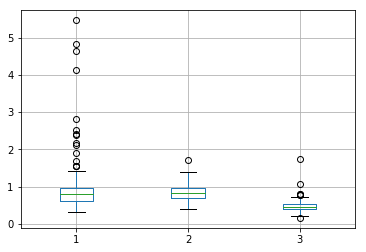

In [107]:
df_t1.boxplot(column=[1,2,3])
plt.savefig('T1_more.pdf')

In [31]:
import scipy.stats

In [36]:
def stars(p):
    if p < 0.0001:
        return "****"
    elif (p < 0.001):
        return "***"
    elif (p < 0.01):
        return "**"
    elif (p < 0.05):
        return "*"
    else:
        return "-"

0.06997471939513664
2.569288993187803e-62


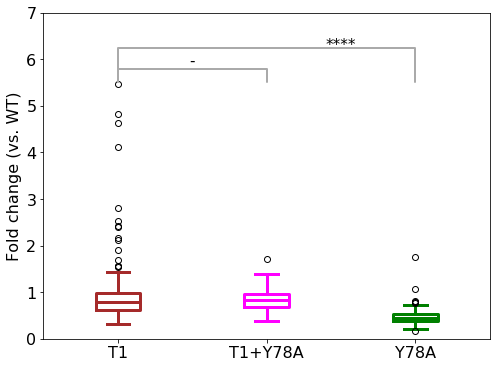

In [108]:
fig = plt.figure(1, figsize=(8,6))
ax = fig.add_subplot(111)
bp = ax.boxplot(df_t1.iloc[:,-3:].T, 0, 
#                patch_artist=True,
                labels=['T1', 'T1+Y78A','Y78A'])
for i, box in enumerate(bp['boxes']):
    if i == 0:
        box.set(color='brown', linewidth=3)
    if i == 1:
        box.set( color='magenta', linewidth=3)
    if i == 2:
        box.set( color='green', linewidth=3)

for i, box in enumerate(bp['caps']):
    if i < 2:
        box.set(color='brown', linewidth=3)
    elif i < 4:
        box.set( color='magenta', linewidth=3)
    elif i < 6:
        box.set( color='green', linewidth=3)  
        
for i, box in enumerate(bp['whiskers']):
    if i < 2:
        box.set(color='brown', linewidth=3)
    elif i < 4:
        box.set( color='magenta', linewidth=3)
    elif i < 6:
        box.set( color='green', linewidth=3)       
        
for i, box in enumerate(bp['medians']):
    if i == 0:
        box.set(color='brown', linewidth=3)
    if i == 1:
        box.set( color='magenta', linewidth=3)
    if i == 2:
        box.set( color='green', linewidth=3)
        
# Set the tick labels font
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(16)
    
ax.set_ylabel('Fold change (vs. WT)', fontsize=16)
        
# do the test 
# Mann-Whitney U test
_, p = scipy.stats.mannwhitneyu(df_t1.iloc[:,-3], df_t1.iloc[:,-2])
y_max = np.max(np.concatenate((df_t1.iloc[:,-3], df_t1.iloc[:,-2])))
y_min = np.min(np.concatenate((df_t1.iloc[:,-3], df_t1.iloc[:,-2])))
# first bar
ax.annotate("", xy=(1, y_max), xycoords='data',
           xytext=(2, y_max), textcoords='data',
           arrowprops=dict(arrowstyle="-", ec='#aaaaaa', lw=2,
                           connectionstyle="bar,fraction=0.1"))
ax.text(1.5, y_max + 0.5, stars(p),fontsize=15,
       horizontalalignment='center',
       verticalalignment='center')

print(p)
# second bar
_, p = scipy.stats.mannwhitneyu(df_t1.iloc[:,-3], df_t1.iloc[:,-1])
y_max = np.max(np.concatenate((df_t1.iloc[:,-3], df_t1.iloc[:,-1])))
y_min = np.min(np.concatenate((df_t1.iloc[:,-3], df_t1.iloc[:,-1])))

ax.annotate("", xy=(1, y_max), xycoords='data',
           xytext=(3, y_max), textcoords='data',
           arrowprops=dict(arrowstyle="-", ec='#aaaaaa', lw=2,
                           connectionstyle="bar,fraction=0.12"))
ax.text(2.5, y_max + abs(y_max - y_min)*0.16, stars(p),fontsize=15,
       horizontalalignment='center',
       verticalalignment='center')

ax.set_ylim([0, 7])

plt.savefig('T1.pdf') 
print(p)

In [109]:
df_t2 = df.loc[:, ['293_ENL_B_treat', '293_T2_B_treat', '293_T2_Y78A_treat', '293_Y78A_B_treat']].copy()
for i in range(1, df_t2.shape[1]):
    df_t2[i] = df_t2.iloc[:,i].div(df_t2.iloc[:,0])
    
df_t2.to_csv('second_batch_T2.txt', sep='\t')      
df_t2.head()

,293_ENL_B_treat,293_T2_B_treat,293_T2_Y78A_treat,293_Y78A_B_treat,1,2,3
0,5.94113,9.85524,5.76976,3.49597,1.658816,0.971155,0.588435
1,4.89210,5.49200,3.38358,3.47496,1.122626,0.691642,0.710321
2,5.80684,7.06172,4.18828,3.98002,1.216104,0.721267,0.685402
3,3.32137,5.30179,4.56770,2.65090,1.596266,1.375246,0.798135
4,6.11496,6.95898,4.42403,3.34084,1.138025,0.723477,0.546339


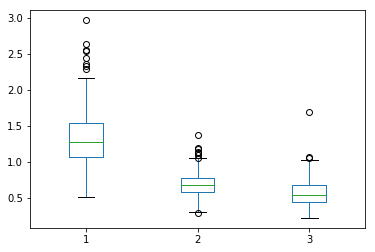

In [110]:
df_t2.boxplot(column=[1,2,3], grid=False, )
plt.savefig('T2_more.pdf')

2.4080599667137697e-75
9.205392689638343e-80


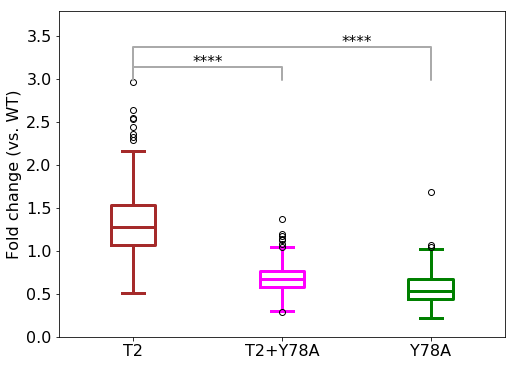

In [113]:
fig = plt.figure(1, figsize=(8,6))
ax = fig.add_subplot(111)
bp = ax.boxplot(df_t2.iloc[:,-3:].T, 0,  
#                patch_artist=True,
                labels=['T2', 'T2+Y78A', 'Y78A'])
for i, box in enumerate(bp['boxes']):
    if i == 0:
        box.set(color='brown', linewidth=3)
    if i == 1:
        box.set( color='magenta', linewidth=3)
    if i == 2:
        box.set( color='green', linewidth=3)

for i, box in enumerate(bp['caps']):
    if i < 2:
        box.set(color='brown', linewidth=3)
    elif i < 4:
        box.set( color='magenta', linewidth=3)
    elif i < 6:
        box.set( color='green', linewidth=3)  
        
for i, box in enumerate(bp['whiskers']):
    if i < 2:
        box.set(color='brown', linewidth=3)
    elif i < 4:
        box.set( color='magenta', linewidth=3)
    elif i < 6:
        box.set( color='green', linewidth=3)       
        
for i, box in enumerate(bp['medians']):
    if i == 0:
        box.set(color='brown', linewidth=3)
    if i == 1:
        box.set( color='magenta', linewidth=3)
    if i == 2:
        box.set( color='green', linewidth=3)
        
for i, box in enumerate(bp['fliers']):
    if i == 0:
        box.set(marker='o', color='brown')
    if i == 1:
        box.set(marker='o', color='magenta')
    if i == 2:
        box.set(marker='o', color='green')
        
# Set the tick labels font
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(16)
    
ax.set_ylabel('Fold change (vs. WT)', fontsize=16)     
        
# do the test 
# Mann-Whitney U test
_, p = scipy.stats.mannwhitneyu(df_t2.iloc[:,-3], df_t2.iloc[:,-2])
y_max = np.max(np.concatenate((df_t2.iloc[:,-3], df_t2.iloc[:,-2])))
y_min = np.min(np.concatenate((df_t2.iloc[:,-3], df_t2.iloc[:,-2])))
# first bar
ax.annotate("", xy=(1, y_max), xycoords='data',
           xytext=(2, y_max), textcoords='data',
           arrowprops=dict(arrowstyle="-", ec='#aaaaaa', lw=2,
                           connectionstyle="bar,fraction=0.1"))
ax.text(1.5, y_max + 0.225, stars(p),fontsize=15,
       horizontalalignment='center',
       verticalalignment='center')
print(p)
# second bar
_, p = scipy.stats.mannwhitneyu(df_t2.iloc[:,-3], df_t2.iloc[:,-1])
y_max = np.max(np.concatenate((df_t2.iloc[:,-3], df_t2.iloc[:,-1])))
y_min = np.min(np.concatenate((df_t2.iloc[:,-3], df_t2.iloc[:,-1])))

ax.annotate("", xy=(1, y_max), xycoords='data',
           xytext=(3, y_max), textcoords='data',
           arrowprops=dict(arrowstyle="-", ec='#aaaaaa', lw=2,
                           connectionstyle="bar,fraction=0.12"))
ax.text(2.5, y_max + abs(y_max - y_min)*0.168, stars(p),fontsize=15,
       horizontalalignment='center',
       verticalalignment='center')    

ax.set_ylim([0, 3.8])
    
plt.savefig('T2.pdf')  
print(p)

In [114]:
df_t3 = df.loc[:, ['293_ENL_B_treat', '293_T3_B_treat',  '293_T3_Y78A_treat', '293_Y78A_B_treat']].copy()
for i in range(1, df_t3.shape[1]):
    df_t3[i] = df_t3.iloc[:,i].div(df_t3.iloc[:,0])

df_t3.to_csv('second_batch_T3.txt', sep='\t')  
df_t3.head()

,293_ENL_B_treat,293_T3_B_treat,293_T3_Y78A_treat,293_Y78A_B_treat,1,2,3
0,5.94113,12.61530,4.55484,3.49597,2.123384,0.766662,0.588435
1,4.89210,6.17656,3.90398,3.47496,1.262558,0.798017,0.710321
2,5.80684,8.37433,5.29307,3.98002,1.442149,0.911523,0.685402
3,3.32137,6.55302,3.68515,2.65090,1.972987,1.109527,0.798135
4,6.11496,7.15309,4.99307,3.34084,1.169769,0.816534,0.546339


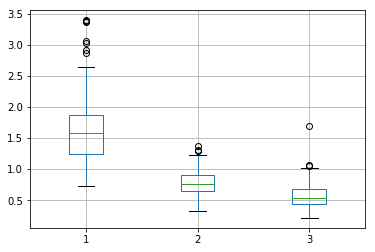

In [115]:
df_t3.boxplot(column=[1,2,3])
plt.savefig('T3_more.pdf')

### peakBed = "293.all.1_5.bed"
comp_avg_sig_from_bw_by_bed(peakBed, bwfiles, 3)

## calcualte the fold change

In [118]:
df = pd.read_csv('293.all.1_5.counts.txt', sep='\t',header=0)
df.head(3)

,chr,start,end,width,293_ENL_C_treat,293_ENL_B_treat,293_T1_C_treat,293_Y78A_B_treat,293_T1_Y78A_treat,293_T2_B_treat,293_T2_Y78A_treat,293_T3_B_treat,293_T3_Y78A_treat
0,chr12,22093615,22095545,1930.0,5.65285,5.00259,4.91192,2.77461,5.19430,4.68912,2.79793,7.84456,4.58808
1,chr12,40498570,40500215,1645.0,6.49544,7.14286,4.00304,2.90274,6.31003,7.07903,4.24012,7.59271,3.91185
2,chr12,54332285,54334216,1931.0,8.12170,6.06888,8.19161,3.14759,8.07820,11.13360,5.90523,14.54170,5.49508


8.857366926701552e-06
4.014745947149245e-18


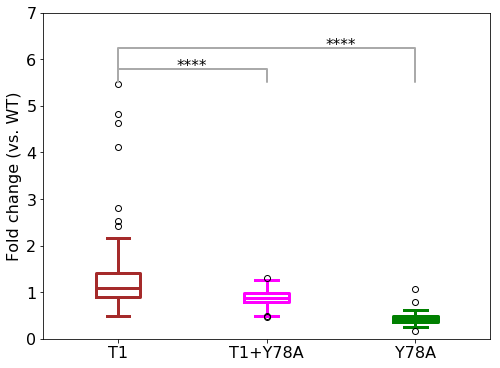

In [119]:
df_t1 = df.loc[:, ['293_ENL_C_treat', '293_T1_C_treat', '293_T1_Y78A_treat', '293_Y78A_B_treat']].copy()
for i in range(1, df_t1.shape[1]):
    df_t1[i] = df_t1.iloc[:,i].div(df_t1.iloc[:,0])
df_t1.to_csv('second_batch_T1.txt', sep='\t')

fig = plt.figure(1, figsize=(8,6))
ax = fig.add_subplot(111)
bp = ax.boxplot(df_t1.iloc[:,-3:].T, 0, 
#                patch_artist=True,
                labels=['T1', 'T1+Y78A','Y78A'])
for i, box in enumerate(bp['boxes']):
    if i == 0:
        box.set(color='brown', linewidth=3)
    if i == 1:
        box.set( color='magenta', linewidth=3)
    if i == 2:
        box.set( color='green', linewidth=3)

for i, box in enumerate(bp['caps']):
    if i < 2:
        box.set(color='brown', linewidth=3)
    elif i < 4:
        box.set( color='magenta', linewidth=3)
    elif i < 6:
        box.set( color='green', linewidth=3)  
        
for i, box in enumerate(bp['whiskers']):
    if i < 2:
        box.set(color='brown', linewidth=3)
    elif i < 4:
        box.set( color='magenta', linewidth=3)
    elif i < 6:
        box.set( color='green', linewidth=3)       
        
for i, box in enumerate(bp['medians']):
    if i == 0:
        box.set(color='brown', linewidth=3)
    if i == 1:
        box.set( color='magenta', linewidth=3)
    if i == 2:
        box.set( color='green', linewidth=3)
        
# Set the tick labels font
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(16)
    
ax.set_ylabel('Fold change (vs. WT)', fontsize=16)
        
# do the test 
# Mann-Whitney U test
_, p = scipy.stats.mannwhitneyu(df_t1.iloc[:,-3], df_t1.iloc[:,-2])
y_max = np.max(np.concatenate((df_t1.iloc[:,-3], df_t1.iloc[:,-2])))
y_min = np.min(np.concatenate((df_t1.iloc[:,-3], df_t1.iloc[:,-2])))
# first bar
ax.annotate("", xy=(1, y_max), xycoords='data',
           xytext=(2, y_max), textcoords='data',
           arrowprops=dict(arrowstyle="-", ec='#aaaaaa', lw=2,
                           connectionstyle="bar,fraction=0.1"))
ax.text(1.5, y_max + 0.4, stars(p),fontsize=15,
       horizontalalignment='center',
       verticalalignment='center')
print(p)
# second bar
_, p = scipy.stats.mannwhitneyu(df_t1.iloc[:,-3], df_t1.iloc[:,-1])
y_max = np.max(np.concatenate((df_t1.iloc[:,-3], df_t1.iloc[:,-1])))画册合同33我vv6
y_min = np.min(np.concatenate((df_t1.iloc[:,-3], df_t1.iloc[:,-1])))

ax.annotate("", xy=(1, y_max), xycoords='data',vhhhhhhhhh
           xytext=(3, y_max), textcoords='data',
           arrowprops=dict(arrowstyle="-", ec='#aaaaaa', lw=2,
                           connectionstyle="bar,fraction=0.12"))
ax.text(2.5, y_max + abs(y_max - y_min)*0.16, stars(p),fontsize=15,
       horizontalalignment='center',
       verticalalignment='center')

ax.set_ylim([0, 7])

plt.savefig('T1_1.5.pdf')   
print(p)

7.102104622313781e-19
2.9446352898967396e-19


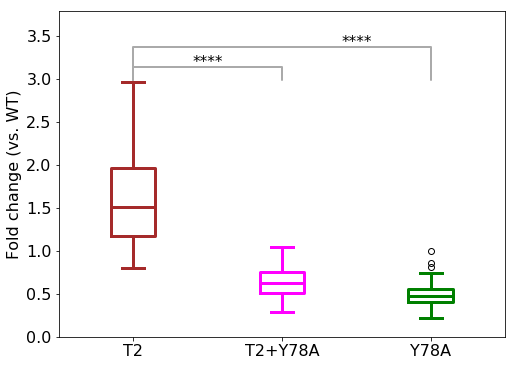

In [120]:
df_t2 = df.loc[:, ['293_ENL_B_treat', '293_T2_B_treat', '293_T2_Y78A_treat', '293_Y78A_B_treat']].copy()
for i in range(1, df_t2.shape[1]):
    df_t2[i] = df_t2.iloc[:,i].div(df_t2.iloc[:,0])
    
df_t2.to_csv('second_batch_T2.txt', sep='\t') 

fig = plt.figure(1, figsize=(8,6))
ax = fig.add_subplot(111)
bp = ax.boxplot(df_t2.iloc[:,-3:].T, 0,  
#                patch_artist=True,
                labels=['T2', 'T2+Y78A', 'Y78A'])
for i, box in enumerate(bp['boxes']):
    if i == 0:
        box.set(color='brown', linewidth=3)
    if i == 1:
        box.set( color='magenta', linewidth=3)
    if i == 2:
        box.set( color='green', linewidth=3)

for i, box in enumerate(bp['caps']):
    if i < 2:
        box.set(color='brown', linewidth=3)
    elif i < 4:
        box.set( color='magenta', linewidth=3)
    elif i < 6:
        box.set( color='green', linewidth=3)  
        
for i, box in enumerate(bp['whiskers']):
    if i < 2:
        box.set(color='brown', linewidth=3)
    elif i < 4:
        box.set( color='magenta', linewidth=3)
    elif i < 6:
        box.set( color='green', linewidth=3)       
        
for i, box in enumerate(bp['medians']):
    if i == 0:
        box.set(color='brown', linewidth=3)
    if i == 1:
        box.set( color='magenta', linewidth=3)
    if i == 2:
        box.set( color='green', linewidth=3)
        
for i, box in enumerate(bp['fliers']):
    if i == 0:
        box.set(marker='o', color='brown')
    if i == 1:
        box.set(marker='o', color='magenta')
    if i == 2:
        box.set(marker='o', color='green')
        
# Set the tick labels font
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(16)
    
ax.set_ylabel('Fold change (vs. WT)', fontsize=16)     
        
# do the test 
# Mann-Whitney U test
_, p = scipy.stats.mannwhitneyu(df_t2.iloc[:,-3], df_t2.iloc[:,-2])
y_max = np.max(np.concatenate((df_t2.iloc[:,-3], df_t2.iloc[:,-2])))
y_min = np.min(np.concatenate((df_t2.iloc[:,-3], df_t2.iloc[:,-2])))
# first bar
ax.annotate("", xy=(1, y_max), xycoords='data',
           xytext=(2, y_max), textcoords='data',
           arrowprops=dict(arrowstyle="-", ec='#aaaaaa', lw=2,
                           connectionstyle="bar,fraction=0.1"))
ax.text(1.5, y_max + 0.225, stars(p),fontsize=15,
       horizontalalignment='center',
       verticalalignment='center')
print(p)
# second bar
_, p = scipy.stats.mannwhitneyu(df_t2.iloc[:,-3], df_t2.iloc[:,-1])
y_max = np.max(np.concatenate((df_t2.iloc[:,-3], df_t2.iloc[:,-1])))
y_min = np.min(np.concatenate((df_t2.iloc[:,-3], df_t2.iloc[:,-1])))

ax.annotate("", xy=(1, y_max), xycoords='data',
           xytext=(3, y_max), textcoords='data',
           arrowprops=dict(arrowstyle="-", ec='#aaaaaa', lw=2,
                           connectionstyle="bar,fraction=0.12"))
ax.text(2.5, y_max + abs(y_max - y_min)*0.168, stars(p),fontsize=15,
       horizontalalignment='center',
       verticalalignment='center')    

ax.set_ylim([0, 3.8])
print(p)    
plt.savefig('T2_1.5.pdf')   

6.723746795552688e-19
1.8892884306294572e-19


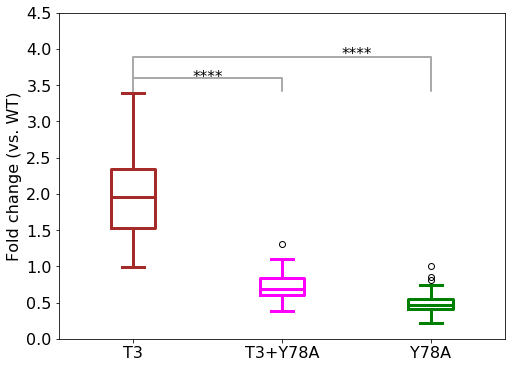

In [121]:
df_t3 = df.loc[:, ['293_ENL_B_treat', '293_T3_B_treat',  '293_T3_Y78A_treat', '293_Y78A_B_treat']].copy()
for i in range(1, df_t3.shape[1]):
    df_t3[i] = df_t3.iloc[:,i].div(df_t3.iloc[:,0])

df_t3.to_csv('second_batch_T3.txt', sep='\t')  

fig = plt.figure(1, figsize=(8,6))
ax = fig.add_subplot(111)
bp = ax.boxplot(df_t3.iloc[:,-3:].T, 0, 
#                patch_artist=True,
                labels=['T3', 'T3+Y78A', 'Y78A'])
for i, box in enumerate(bp['boxes']):
    if i == 0:
        box.set(color='brown', linewidth=3)
    if i == 1:
        box.set( color='magenta', linewidth=3)
    if i == 2:
        box.set( color='green', linewidth=3)

for i, box in enumerate(bp['caps']):
    if i < 2:
        box.set(color='brown', linewidth=3)
    elif i < 4:
        box.set( color='magenta', linewidth=3)
    elif i < 6:
        box.set( color='green', linewidth=3)  
        
for i, box in enumerate(bp['whiskers']):
    if i < 2:
        box.set(color='brown', linewidth=3)
    elif i < 4:
        box.set( color='magenta', linewidth=3)
    elif i < 6:
        box.set( color='green', linewidth=3)       
        
for i, box in enumerate(bp['medians']):
    if i == 0:
        box.set(color='brown', linewidth=3)
    if i == 1:
        box.set( color='magenta', linewidth=3)
    if i == 2:
        box.set( color='green', linewidth=3)
        
for i, box in enumerate(bp['fliers']):
    if i == 0:
        box.set(marker='o', color='brown')
    if i == 1:
        box.set(marker='o', color='magenta')
    if i == 2:
        box.set(marker='o', color='green')
        
# Set the tick labels font
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(16)
    
ax.set_ylabel('Fold change (vs. WT)', fontsize=16)     
        
# do the test 
# Mann-Whitney U test
_, p = scipy.stats.mannwhitneyu(df_t3.iloc[:,-3], df_t3.iloc[:,-2])
y_max = np.max(np.concatenate((df_t3.iloc[:,-3], df_t3.iloc[:,-2])))
y_min = np.min(np.concatenate((df_t3.iloc[:,-3], df_t3.iloc[:,-2])))
# first bar
ax.annotate("", xy=(1, y_max), xycoords='data',
           xytext=(2, y_max), textcoords='data',
           arrowprops=dict(arrowstyle="-", ec='#aaaaaa', lw=2,
                           connectionstyle="bar,fraction=0.1"))
ax.text(1.5, y_max + 0.225, stars(p),fontsize=15,
       horizontalalignment='center',
       verticalalignment='center')
print(p)
# second bar
_, p = scipy.stats.mannwhitneyu(df_t3.iloc[:,-3], df_t3.iloc[:,-1])
y_max = np.max(np.concatenate((df_t3.iloc[:,-3], df_t3.iloc[:,-1])))
y_min = np.min(np.concatenate((df_t3.iloc[:,-3], df_t3.iloc[:,-1])))

ax.annotate("", xy=(1, y_max), xycoords='data',
           xytext=(3, y_max), textcoords='data',
           arrowprops=dict(arrowstyle="-", ec='#aaaaaa', lw=2,
                           connectionstyle="bar,fraction=0.12"))
ax.text(2.5, y_max + abs(y_max - y_min)*0.168, stars(p),fontsize=15,
       horizontalalignment='center',
       verticalalignment='center') 

ax.set_ylim([0,4.5])
print(p)
plt.savefig('T3_1.5.pdf') 